In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
base = pd.read_csv(r'Dados/general.csv')
clusters = np.loadtxt(r'Dados/clusters_modelo_final.csv', delimiter=',')
centroides = np.loadtxt(r'Dados/centroides_modelo_final.csv', delimiter=',')

In [3]:
base['clusters'] = clusters

In [4]:
base.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusters
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0.0
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,4.0
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0.0
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,0.0
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2.0


In [5]:
# Verificando as métricas estatísticas para cada métrica em cada cluster:
clusters_describe = base.groupby('clusters').describe()

clusters_describe

BALANCE                                                      
           count         mean          std         min          25%   
clusters                                                              
0.0       3203.0   418.043217   797.366382    0.000000    22.836917  \
1.0        980.0  1765.930464  2002.399798    0.000000   496.729589   
2.0       1796.0  3242.269276  2630.347375  114.523682  1355.372679   
3.0       1486.0  1118.416733  1649.518087    0.000000   208.787132   
4.0       1143.0  2429.889170  2032.506183    1.691842   945.019242   
5.0        342.0  1959.062058  1816.549846   70.794108  1010.501276   

                                                 BALANCE_FREQUENCY             
                  50%          75%           max             count      mean   
clusters                                                                       
0.0         79.345909   379.791429   7533.854422            3203.0  0.774420  \
1.0       1064.390915  2266.235261  14581.459140             980.0  0.856339   
2.0       2268.945669  4490.172352  18495.558550            1796.0  0.998536   
3.0        539.366142  1359.237898  19043.138560            1486.0  0.929514   
4.0       1845.210833  3327.567339  11581.933500            1143.0  0.892026   
5.0       1301.788287  2150.506925  11209.370760             342.0  0.987365   

          ... PRC_FULL_PAYMENT            TENURE                             
          ...              75%       max   count       mean       std  min   
clusters  ...                                                                
0.0       ...         0.454545  1.000000  3203.0  11.552295  1.305826  6.0  \
1.0       ...         0.166667  1.000000   980.0  11.582653  1.207867  6.0   
2.0       ...         0.000000  0.090909  1796.0  11.829065  0.748824  6.0   
3.0       ...         0.571429  1.000000  1486.0  11.578062  1.244637  6.0   
4.0       ...         0.000000  0.600000  1143.0  10.724409  2.013568  6.0   
5.0       ...         0.000000  1.000000   342.0  11.751462  0.902707  7.0   

                                  
           25%   50%   75%   max  
clusters                          
0.0       12.0  12.0  12.0  12.0  
1.0       12.0  12.0  12.0  12.0  
2.0       12.0  12.0  12.0  12.0  
3.0       12.0  12.0  12.0  12.0  
4.0       10.0  12.0  12.0  12.0  
5.0       12.0  12.0  12.0  12.0  

[6 rows x 136 columns]

In [6]:
# É possível acessar variáveis específicas do multi index utilizando o método get_level_values:

clusters_describe.loc[:, clusters_describe.columns.get_level_values(1) == 'mean']

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
clusters,,,,,,,,,,,,,,,,,
0.0,418.043217,0.774420,628.781670,312.101661,317.022947,119.403237,0.572940,0.186473,0.433791,0.029855,0.533562,12.001249,5133.399990,816.706836,214.250331,0.252640,11.552295
1.0,1765.930464,0.856339,528.087051,315.734857,212.410071,3088.658417,0.285646,0.124800,0.198806,0.295246,8.596939,8.409184,3950.837972,4997.168685,750.380572,0.128571,11.582653
2.0,3242.269276,0.998536,519.334337,307.920128,211.559794,762.755415,0.347212,0.154862,0.241365,0.185427,3.707684,9.761136,4418.179287,1052.052473,1161.884942,0.000097,11.829065
3.0,1118.416733,0.929514,3330.059495,2168.094273,1162.603849,185.882816,0.813461,0.469190,0.606912,0.042583,0.876851,38.143338,4111.615176,3052.726585,539.897289,0.284290,11.578062
4.0,2429.889170,0.892026,238.958031,145.658110,93.319361,3106.656278,0.207295,0.081372,0.134778,0.347940,8.893263,4.208224,4475.065617,974.996683,821.677332,0.008869,10.724409
5.0,1959.062058,0.987365,856.281725,151.850380,705.305000,451.824341,0.597199,0.070364,0.549823,0.089397,2.385965,17.397661,2198.684211,1339.886001,6865.322947,0.022729,11.751462


In [7]:
base.groupby('clusters').size().values

array([3203,  980, 1796, 1486, 1143,  342], dtype=int64)

Como existem muitas variáveis, é importante encontrar em quais variáveis há uma grande diferença entre *clusters*. Para isso, serão utilizados os centróides de cada *cluster* e então calculada a variância entre *clusters* para cada variável:

In [8]:
variancias = [centroides[:, i].var() for i in range(len(centroides[0]))]

colunas_variancia = list(base.columns)
colunas_remover = ['CUST_ID', 'TENURE', 'clusters']

for i in colunas_remover:
    colunas_variancia.remove(i)

df_variancias = pd.DataFrame(columns=colunas_variancia, data = [variancias])

df_variancias = df_variancias.transpose()

df_variancias.sort_values(by=[0], ascending = False)

,0
MINIMUM_PAYMENTS,5.387711e-02
CREDIT_LIMIT,3.480063e-02
CASH_ADVANCE,3.450221e-02
PAYMENTS,2.997645e-02
BALANCE,2.540686e-02
PURCHASES,1.832877e-02
ONEOFF_PURCHASES,7.017990e-03
INSTALLMENTS_PURCHASES,3.459628e-03
PURCHASES_TRX,3.216991e-06
CASH_ADVANCE_TRX,4.024568e-07


Como é possível observar acima, as caractéristicas que tiveram variância com maior ordem de grandeza foram MINIMUM_PAYMENTS, CREDIT_LIMIT, CASH_ADVANCE, PAYMENTS, BALANCE, PURCHASES. Portanto essas serão as variáveis avaliadas para interpretar os clusters.


In [9]:
variaveis_de_interesse = list(df_variancias.sort_values(by=[0], ascending = False).index[:6])

In [10]:
clusters_describe[variaveis_de_interesse].loc[:, clusters_describe[variaveis_de_interesse].columns.get_level_values(1) == 'mean'].values

array([[ 214.25033066, 5133.39998991,  119.40323688,  816.70683635,
         418.04321657,  628.78167031],
       [ 750.38057216, 3950.83797155, 3088.65841729, 4997.16868521,
        1765.93046392,  528.08705102],
       [1161.88494174, 4418.17928731,  762.75541467, 1052.05247283,
        3242.2692759 ,  519.33433742],
       [ 539.8972895 , 4111.61517599,  185.88281578, 3052.72658498,
        1118.41673326, 3330.05949529],
       [ 821.67733227, 4475.0656168 , 3106.65627834,  974.9966829 ,
        2429.88917018,  238.9580315 ],
       [6865.32294717, 2198.68421053,  451.8243414 , 1339.88600068,
        1959.06205772,  856.28172515]])

In [11]:
# Criando um dataframe com os valores médios dessas variáveis por cluster:

df_variaveis_de_interesse = pd.concat([pd.DataFrame(columns=['cluster'], data = list(clusters_describe.index)),
                                      pd.DataFrame(columns = variaveis_de_interesse, data = clusters_describe[variaveis_de_interesse].loc[:, clusters_describe[variaveis_de_interesse].columns.get_level_values(1) == 'mean'].values)],
                                      axis = 1)

df_variaveis_de_interesse = pd.concat([df_variaveis_de_interesse,
                                       pd.DataFrame(columns=['n_clients'], data = base.groupby('clusters').size().values)],
                                       axis = 1)

df_variaveis_de_interesse

,cluster,MINIMUM_PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE,PAYMENTS,BALANCE,PURCHASES,n_clients
0,0.0,214.250331,5133.399990,119.403237,816.706836,418.043217,628.781670,3203
1,1.0,750.380572,3950.837972,3088.658417,4997.168685,1765.930464,528.087051,980
2,2.0,1161.884942,4418.179287,762.755415,1052.052473,3242.269276,519.334337,1796
3,3.0,539.897289,4111.615176,185.882816,3052.726585,1118.416733,3330.059495,1486
4,4.0,821.677332,4475.065617,3106.656278,974.996683,2429.889170,238.958031,1143
5,5.0,6865.322947,2198.684211,451.824341,1339.886001,1959.062058,856.281725,342


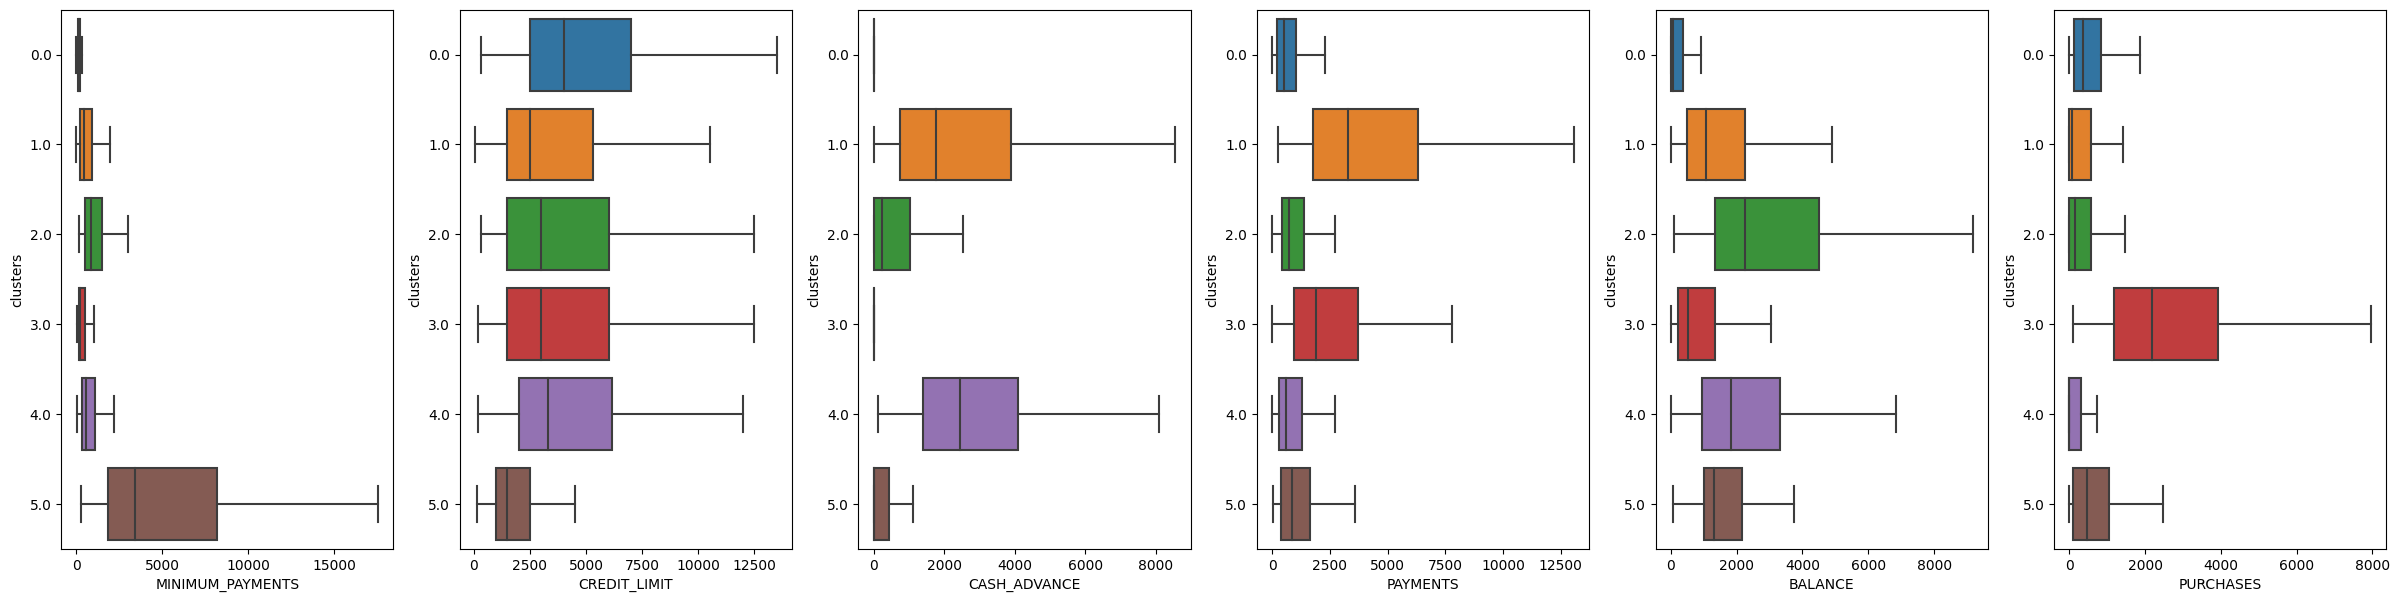

In [12]:
# Criando box-plots por clusters para cada uma das variáveis:

fig, subplots = plt.subplots(1,6,figsize=(30,7))

for i in range(len(variaveis_de_interesse)):
    sns.boxplot(data = base, x = variaveis_de_interesse[i], y ='clusters', showfliers=False, orient='h', ax=subplots[i])

plt.show()